---

In [3]:

!pip install networkx==3.5

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint
import itertools

# Centrality Measures

They are used to identify important nodes in a network. They include:
1. degree centrality,
2. closeness centrality,
3. betweenness centrality,
4. eigenvector centrality (will be covered later, together with HITS and PageRank algorithm).

We will manually compute the first three centrality measures for small graphs. Then, we will calculate the centrality measures using the `networkx` library. Finally, we will apply the measures to a real-world network.

## 1. Degree Centrality

Simply the degree of a node.

### A Small Example 

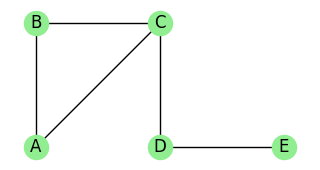

In [8]:
def gener_and_plot_sample1():
    G = nx.Graph()
    G.add_edges_from([('A','B'), ('A','C'), ('C','D'), ('B','C'), ('D','E') ])
    positions = {'A': np.array([ 0,0]), 'B': np.array([0,1]), 'C': np.array([ 1,1]), 
                 'D': np.array([1,0]), 'E': np.array([2,0])}
    plt.figure(figsize=(3,1.5))
    nx.draw(G, pos=positions, node_color='lightgreen')
    _ = nx.draw_networkx_labels(G, positions)
    return G

G1 = gener_and_plot_sample1()

Compute the degree of all nodes **manually**. Fill your results in the cell below. **Do not enter just the number**; insert the expression to compute the desired result.

In [12]:
G1.nodes['A']['degree'] = 2
G1.nodes['B']['degree'] = 2
G1.nodes['C']['degree'] = 3
G1.nodes['D']['degree'] = 2
G1.nodes['E']['degree'] = 1
for n in G1.nodes():
    print(f"The degree of node {n} is {G1.nodes[n]['degree']}")

The degree of node A is 2
The degree of node B is 2
The degree of node C is 3
The degree of node D is 2
The degree of node E is 1


Check the correctness of your answers using a suitable function from `networkx`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Then, implement the following function that returns `k` nodes with the highest degree. 

In [18]:
def top_by_degree(net, k):
    '''Return an ordered list of k pairs (node, degree) with the highest 
    degree centrality in the network net. If the network has less than k nodes, 
    the list should contain all nodes of the network.'''
    data = [(n,net.nodes[n]['degree']) for n in net]
    data = sorted(data, key=lambda x: x[1],reverse=True)
    return data[:k]
















    data = [(n, net.nodes[n]['degree']) for n in net.nodes()]
    data = sorted(data, key=lambda x: x[1], reverse=True)
    return data[:k]

pprint(top_by_degree(G1,2))

[('C', 3), ('A', 2)]


## 2. Closeness Centrality

What is closeness centrality? How can we compute it?

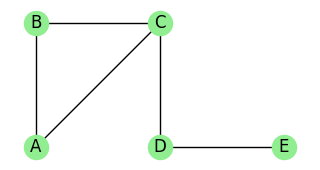

In [19]:
G1 = gener_and_plot_sample1()     # just to repeat the drawing of G1

Compute the closeness of all nodes **manually**. Fill your results in the cell below. **Do not enter just the number**; insert the expression to compute the desired result.

In [ ]:
G1.nodes['A']['closeness'] = 1 + 1 +2 + 3
G1.nodes['B']['closeness'] = 1 + 1 +2 + 3
G1.nodes['C']['closeness'] = 1 + 1 + 1 + 2
G1.nodes['D']['closeness'] = 1 + 1 +2  +2
G1.nodes['E']['closeness'] = 1 + 2 + 3 + 3
# YOUR CODE HERE
for n in G1.nodes():
    print(f"G1.nodes['{n}']['closeness'] = {4/G1.nodes[n]['closeness']}")


G1.nodes['A']['closeness'] = 0.5714285714285714
G1.nodes['B']['closeness'] = 0.5714285714285714
G1.nodes['C']['closeness'] = 0.8
G1.nodes['D']['closeness'] = 0.6666666666666666
G1.nodes['E']['closeness'] = 0.4444444444444444
JUJUJU
G1.nodes['A']['closeness'] = 0.5714285714285714
G1.nodes['B']['closeness'] = 0.5714285714285714
G1.nodes['C']['closeness'] = 0.8
G1.nodes['D']['closeness'] = 0.6666666666666666
G1.nodes['E']['closeness'] = 0.4444444444444444


Check the correctness of your answers using a suitable function from `networkx`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Then, implement the following function that returns `k` nodes with the highest closeness. 

In [ ]:
def top_by_closeness(net, k):
    '''Return an ordered list of k pairs (node, closeness) with the highest 
    closeness centrality in the network net. If the network has less than k nodes, 
    the list should contain all nodes of the network.'''
    # YOUR CODE HERE
    raise NotImplementedError()
    
pprint(top_by_closeness(G1,5))

# ## 3. Betweenness Centrality Measure

Let $G=(V,E)$ be a graph with $|V|=n$ nodes.

1. **Betweenness centrality of a node $v$** is the sum of the fractions of all-pairs shortest paths that pass through $v$

   $$c_B(v) =\displaystyle \sum_{s,t \in V} \frac{p_{s, t}(v)}{p_{s, t}},$$

   where
   * $p_{s, t}$ is the number of shortest $(s, t)$-paths; if $s = t$, $p_{s, t} = 1$, and
   * $p_{s, t}(v)$ is the number of those paths passing through the node $v$ other than $s, t$; if $v \in \{s, t\}$, $p_{s, t}(v) = 0$.
     


   **Normalized betweenness centrality of a node $v$** is the betweenness centrality of the node $v$ divided by $$\displaystyle \frac{(n-1)(n-2)}{2}$$ for undirected graphs, and by $$(n-1)(n-2)$$ for directed graphs.

3. **Betweenness centrality of an edge $e$** is the sum of the fractions of all-pairs shortest paths that pass through $e$

   $$c_B(e) =\displaystyle \sum_{s,t \in V} \frac{p_{s, t}(e)}{p_{s, t}},$$

   where $V$ is the set of nodes, $p_{s, t})$ is the number of shortest $(s, t)$-paths, and $p_{s, t}(e)$ is the number of those paths passing through edge $e$.

   **Normalized betweenness centrality of an edge $e$** is the betweenness centrality of the edge $e$ divided by $\displaystyle \frac{n(n-1)}{2}$ for graphs, and by ${n(n-1)}$ for directed graphs.

## A Small Example 

### Example 1

In [ ]:
G1 = gener_and_plot_sample1()     # just to repeat the drawing of G1

Compute **manually** betweenness and normalized betweenness for all nodes and edges of `G1`. Replace the ellipses (...) in the cell below with your computation. **Do not enter just the number**; insert the expression to compute the desired result.

In [ ]:
# betweenness
G1.nodes['A']['betweenness'] = ...
G1.nodes['B']['betweenness'] = ...
G1.nodes['C']['betweenness'] = ...
G1.nodes['D']['betweenness'] = ...
G1.nodes['E']['betweenness'] = ...


G1.edges['A','B']['betweenness'] = ...
G1.edges['A','C']['betweenness'] = ...
G1.edges['B','C']['betweenness'] = ...
G1.edges['C','D']['betweenness'] = ...
G1.edges['D','E']['betweenness'] = ...

# normalized betweenness
G1.nodes['A']['normalized_betweenness'] = ...
G1.nodes['B']['normalized_betweenness'] = ...
G1.nodes['C']['normalized_betweenness'] = ...
G1.nodes['D']['normalized_betweenness'] = ...
G1.nodes['E']['normalized_betweenness'] = ...


G1.edges['A','B']['normalized_betweenness'] = ...
G1.edges['A','C']['normalized_betweenness'] = ...
G1.edges['B','C']['normalized_betweenness'] = ...
G1.edges['C','D']['normalized_betweenness'] = ...
G1.edges['D','E']['normalized_betweenness'] = ...
### BEG1IN SOLUTION
# betweenness
G1.nodes['A']['betweenness'] = ...
G1.nodes['B']['betweenness'] = ...
G1.nodes['C']['betweenness'] = ...
G1.nodes['D']['betweenness'] = ...
G1.nodes['E']['betweenness'] = ...


G1.edges['A','B']['betweenness'] = ...
G1.edges['A','C']['betweenness'] = ...
G1.edges['B','C']['betweenness'] = ...
G1.edges['C','D']['betweenness'] = ...
G1.edges['D','E']['betweenness'] = ...

# normalized betweenness
G1.nodes['A']['normalized_betweenness'] = ...
G1.nodes['B']['normalized_betweenness'] = ...
G1.nodes['C']['normalized_betweenness'] = ...
G1.nodes['D']['normalized_betweenness'] = ...
G1.nodes['E']['normalized_betweenness'] = ...


G1.edges['A','B']['normalized_betweenness'] = ...
G1.edges['A','C']['normalized_betweenness'] = ...
G1.edges['B','C']['normalized_betweenness'] = ...
G1.edges['C','D']['normalized_betweenness'] = ...
G1.edges['D','E']['normalized_betweenness'] = ...

for n in G1.nodes():
    print(f"G1.nodes['{n}']['betweenness'] = {G1.nodes[n]['betweenness']}")   

for n in G1.nodes():
    print(f"G1.nodes['{n}']['normalized_betweenness'] = {G1.nodes[n]['normalized_betweenness']}")   


for source, target in G1.edges():
    print(f"G1.edges['{source}', '{target}']['betweenness'] = {G1.edges[source, target]['betweenness']}")

for source, target in G1.edges():
    print(f"G1.edges['{source}', '{target}']['normalized_betweenness'] = {G1.edges[source, target]['normalized_betweenness']}")


In [ ]:
import itertools

for source, target in itertools.combinations(G1.nodes(), 2):
    print(list(nx.all_shortest_paths(G1, source, target)))

In [ ]:
btwns_centrality = nx.betweenness_centrality(G1, normalized=False)

for n in G1.nodes():
    print(f"Betweenness centrality of node {n}: manually {G1.nodes[n]['betweenness']}"
          f" networkx {btwns_centrality[n]}")

In [ ]:
norm_btwns_centrality = nx.betweenness_centrality(G1, normalized=True)

for n in G1.nodes():
    print(f"Normalized betweenness centrality of node {n}: manually {G1.nodes[n]['normalized_betweenness']}"
          f" networkx {norm_btwns_centrality[n]}")

In [ ]:
edge_btwns_centrality = nx.edge_betweenness_centrality(G1, normalized=False)

for source, target in G1.edges():
    print(f"Betweenness centrality of edge {(source,target)}:"
          f" manually {G1.edges[source,target]['betweenness']}"
          f" networkx {edge_btwns_centrality[source,target]}")

In [ ]:
norm_edge_btwns_centrality = nx.edge_betweenness_centrality(G1, normalized=True)

for source, target in G1.edges():
    print(f"Normaized betweenness centrality of edge {(source,target)}:"
          f" manually {G1.edges[source,target]['betweenness']}"
          f" networkx {norm_edge_btwns_centrality[source,target]}")

In [ ]:
def top_by_node_betweenness(net, k, normalized=False):
    '''Return an ordered list of k pairs (node, betweenness) with the highest (node)
    betweenness centrality in the network net. If the network has less than k nodes, 
    the list should contain all nodes of the network.'''
    # YOUR CODE HERE
    raise NotImplementedError()
    
pprint(top_by_node_betweenness(G1, 5, normalized=True))

In [ ]:
def top_by_edge_betweenness(net, k, normalized=False):
    '''Return an ordered list of k pairs (edge, betweenness) with the highest (edge)
    betweenness centrality in the network net. If the network has less than k edges, 
    the list should contain all nodes of the network.'''
    # YOUR CODE HERE
    raise NotImplementedError()
    
pprint(top_by_edge_betweenness(G1, 5, normalized=True))

### Example 2

In [ ]:
G2 = nx.Graph()
G2.add_edges_from([('A','B'), ('A','C'), ('C','D'), ('B','C'), ('D','E'), 
                  ('A','D'), ('D','F'), ('E','F') ])
positions = {'A': np.array([ 0,0]), 'B': np.array([0,1]), 'C': np.array([ 1,1]), 
             'D': np.array([1,0]), 'E': np.array([2,0]), 'F': np.array([2,1])}
plt.figure(figsize=(3,1.5))
nx.draw(G2, pos=positions)
_ = nx.draw_networkx_labels(G2, positions)

Compute **manually** betweenness and normalized betweenness for all nodes and edges. Replace the ellipses (...) in the cell below with your results):

In [ ]:
# betweenness
G2.nodes['A']['betweenness'] = ...
G2.nodes['B']['betweenness'] = ...
G2.nodes['C']['betweenness'] = ...
G2.nodes['D']['betweenness'] = ...
G2.nodes['E']['betweenness'] = ...
G2.nodes['F']['betweenness'] = ...

G2.edges['A','B']['betweenness'] = ...
G2.edges['A','C']['betweenness'] = ...
G2.edges['A','D']['betweenness'] = ...
G2.edges['B','C']['betweenness'] = ...
G2.edges['C','D']['betweenness'] = ...
G2.edges['D','E']['betweenness'] = ...
G2.edges['D','F']['betweenness'] = ...
G2.edges['E','F']['betweenness'] = ...

# normalized betweenness
G2.nodes['A']['normalized_betweenness'] = ...
G2.nodes['B']['normalized_betweenness'] = ...
G2.nodes['C']['normalized_betweenness'] = ...
G2.nodes['D']['normalized_betweenness'] = ...
G2.nodes['E']['normalized_betweenness'] = ...
G2.nodes['F']['normalized_betweenness'] = ...

G2.edges['A','B']['normalized_betweenness'] = ...
G2.edges['A','C']['normalized_betweenness'] = ...
G2.edges['A','D']['normalized_betweenness'] = ...
G2.edges['B','C']['normalized_betweenness'] = ...
G2.edges['C','D']['normalized_betweenness'] = ...
G2.edges['D','E']['normalized_betweenness'] = ...
G2.edges['D','F']['normalized_betweenness'] = ...
G2.edges['E','F']['normalized_betweenness'] = ...

In [ ]:
import itertools

for source, target in itertools.combinations(G2.nodes(), 2):
    print(list(nx.all_shortest_paths(G2, source, target)))

In [ ]:
btwns_centrality = nx.betweenness_centrality(G2, normalized=False)

for n in G2.nodes():
    print(f"Betweenness centrality of node {n}: manually {G2.nodes[n]['betweenness']}"
          f" networkx {btwns_centrality[n]}")

In [ ]:
norm_btwns_centrality = nx.betweenness_centrality(G2, normalized=True)

for n in G2.nodes():
    print(f"Normalized betweenness centrality of node {n}: manually {G2.nodes[n]['normalized_betweenness']}"
          f" networkx {norm_btwns_centrality[n]}")

In [ ]:
edge_btwns_centrality = nx.edge_betweenness_centrality(G2, normalized=False)

for source, target in G2.edges():
    print(f"Betweenness centrality of edge {(source,target)}:"
          f" manually {G2.edges[source,target]['betweenness']}"
          f" networkx {edge_btwns_centrality[source,target]}")

In [ ]:
norm_edge_btwns_centrality = nx.edge_betweenness_centrality(G2, normalized=True)

for source, target in G2.edges():
    print(f"Normaized betweenness centrality of edge {(source,target)}:"
          f" manually {G2.edges[source,target]['betweenness']}"
          f" networkx {norm_edge_btwns_centrality[source,target]}")

In [ ]:
pprint(top_by_node_betweenness(G2, 5, normalized=True))

In [ ]:
pprint(top_by_edge_betweenness(G2, 5, normalized=True))

## Real-World Example

We will use data on the United Kingdom's suffragette activists. Collected by the authors of the following paper

> Crossley, N., Edwards, G., Harries, E., & Stevenson, R. (2012).
> Covert social movement networks and the secrecy-efficiency trade off: The case of the UK suffragettes
> (1906–1914). Social Networks, 34(4), 634-644. [https://sites.google.com/site/ucinetsoftware/datasets/covert-networks/suffragettes](https://sites.google.com/site/ucinetsoftware/datasets/covert-networks/suffragettes)

We will use the following code to load the data matrix 1216x398 person by arrest date and location (`50_all_2M.csv`) and project it into a bipartite network. Some persons have two lines in the data file. We will merge persons with the same name. 

In [ ]:
from pathlib import Path
from networkx import bipartite

# Create an empty affiliation network and list of people
B = nx.Graph()

# peoples will be the first kind of nodes; we will collect them in a set
people = set()

# Load data file into network
with open('50_ALL_2M.csv') as f:
    # Parse header
    events = next(f).strip().split(",")[1:]

    # Parse rows
    for row in f:
        parts = row.strip().split(",")
        person = parts[0]
        people.add(person)
        for j, value in enumerate(parts[1:]):
            if value != "0":
                B.add_edge(person, events[j], weight=int(value))

# Project into a person-person co-affiliation network
G = bipartite.projected_graph(B, people)

In [ ]:
import pandas as pd

df = pd.read_csv('50_ALL_2M.csv', header=0, index_col=0)
sums = df.sum()
sums

In [ ]:
sums.sum()

Solve the following tasks:
1. Compute the betweenness centralities for nodes.
2. Sort nodes according to decreasing betweenness centrality.
3. Print 10 nodes with the highest betweenness centrality together with the respective value of the betweenness centrality.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Next we will search suffragettes in the list of suffragettes in Wikipedia page [List of suffragists and suffragettes](https://en.wikipedia.org/wiki/List_of_suffragists_and_suffragettes).

In [ ]:
from mediawiki import MediaWiki
import mediawiki
wikipedia = MediaWiki()

In [ ]:
page = wikipedia.page('List of British suffragists and suffragettes')
page.html.find('Maud Joachim')

The first suffragette Maud Joachim is listed among the active suffraggettes. Create a plot where for $i$, the value is the number of suffraggettes listed in Wikipedia among the top $i$ sufraggettes according to the betweennes.

In [ ]:
page = wikipedia.page('List of British suffragists and suffragettes')
counter = []
count = 0
# YOUR CODE HERE
raise NotImplementedError()
plt.plot(counter)
plt.grid()
print(counter)

# Facebook Network Analysis

based on a [Networkx guide](https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html#betweenness-centrality).

Our data consists of the facebook circles (friends lists) of ten people. The dataset can be found at this link http://snap.stanford.edu/data/ego-Facebook.html. The network is undirected and has no weights. Each node represents an anonymized facebook user that belongs to one of those ten friends lists.
Each edge corresponds to the friendship of two facebook users that belong to this network. The ten original friends are the nodes $0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980$, we will call them the **spotlight nodes**.

In [ ]:
# import packages 
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

We load the edges from a gziped data file into a pandas dataframe. 

In [ ]:
facebook = pd.read_csv(
    "facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook

We create the network from the `facebook` dataframe of the edges:

In [ ]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

Let us visualize the network.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

Such visualization is not helpful. Randomly positioned nodes are not useful. We can do better with `spring_layout`. However, we must limit the number of iterations to avoid long running time.


In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721)

In [ ]:
spotlight_nodes = [0,107,348,414,686,698,1684,1912,3437,3980]

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
node_color = ['C1' if v in spotlight_nodes else 'C0' for v in G.nodes()]
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=node_color)


In [ ]:
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())
print('Average degree:', 2*G.number_of_edges() / G.number_of_nodes())

Compute `degree_centrality` as  

In [ ]:
degree_centrality = nx.degree(G)  # save results in a variable to use again
sorted_degree_centrality = sorted(degree_centrality, key=lambda item: item[1], reverse=True)
pprint(sorted_degree_centrality[:10])
degree_centrality_normalized = nx.centrality.degree_centrality(G)  # save results in a variable to use again
(sorted(degree_centrality_normalized.items(), key=lambda item: item[1], reverse=True))[:10]

Are the spotlight nodes the nodes with the highest degree centrality in the network?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(dict(degree_centrality).values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ")
# plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality")
plt.ylabel("Counts")

Based on the degree centrality, we can vizualize the degrees.

In [ ]:
# set up nodes size for a nice graph representation
node_size = [v * 2 for v in dict(degree_centrality).values()] 
plt.figure(figsize=(12, 5))
nx.draw_networkx(G, pos=pos, node_size=node_size, node_color=node_color, with_labels=False, width=0.15)
_ = plt.axis("off")

Similarly, we can calculate betweenness centrality.

In [ ]:
betweenness_centrality = nx.centrality.betweenness_centrality(G)
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Counts")

In [ ]:
node_size = [v * 1000 for v in betweenness_centrality.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(12, 5))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
_ = plt.axis("off")